D:\Temp\ipykernel_1996\3651853957.py:5: RuntimeWarning: overflow encountered in exp
  return np.fmax(1-np.exp(-k*(t-tstart)**n),0)
D:\Temp\ipykernel_1996\3651853957.py:5: RuntimeWarning: invalid value encountered in power
  return np.fmax(1-np.exp(-k*(t-tstart)**n),0)


[3.90095632e+00 1.45661737e+00 9.36194321e-03 4.83816007e+01]


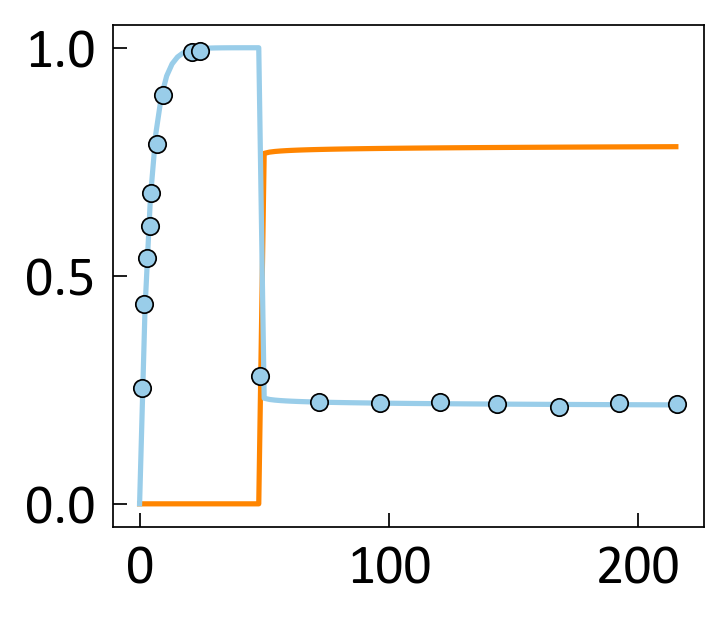

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
def alpha(t,k,n,tstart):
    return np.fmax(1-np.exp(-k*(t-tstart)**n),0)
def X_SolvAmorph(t,tau):
    return (1-np.exp(-t/tau))
def X_Solv(t,tau,k,n,tstart):
    return X_SolvAmorph(t,tau)*(1-alpha(t,k,n,tstart))

texp=np.asarray([1.022146508,1.703577513,3.066439523,4.088586031,4.429301533,6.814310051,9.199318569,21.12436116,24.19080068,48.38160136,71.89097104,96.42248722,120.2725724,143.4412266,167.9727428,192.1635434,215.3321976])
mexp=np.asarray([0.254915254,0.437966102,0.539661017,0.608813559,0.682033898,0.789830508,0.89559322,0.991186441,0.993220339,0.279322034,0.222372881,0.220338983,0.222372881,0.218305085,0.21220339,0.220338983,0.218305085])

t=np.linspace(0,215,100)

tau=10
X_SolvAmorpht=X_SolvAmorph(t,tau)
k=0.01
n=1
tstart=35
alphat=alpha(t,k,n,tstart)
X_Solvt=X_Solv(t,tau,k,n,tstart)

result,pcov=scipy.optimize.curve_fit(X_Solv,texp,mexp)
print(result)

tau,k,n,tstart=tuple(result)

result2=np.delete(result,0)
#result2=result[1:]
result3=np.delete(result,(1,2,3))
#result3=result[0]
X_Solvt=X_Solv(t,*result)
alphat=alpha(t,*result2)
X_SolvAmorpht=X_SolvAmorph(t,*result3)
fig,ax=plt.subplots()

# ax.plot(t,X_SolvAmorpht,'C3-')
ax.plot(t,alphat,'C3-')
ax.plot(t,X_Solvt,'C1-')
ax.plot(texp,mexp,'C1o')
plt.show()


